In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc

Construir una funcion de dos variables de modo que:
$$
\sum_{n=0}^{N} r^n = G(r,N)
$$
Con una grafica, analice la convergencia de la sumatoria en funcion de N para $r = \frac{1}{2},\frac{1}{5},1,2$

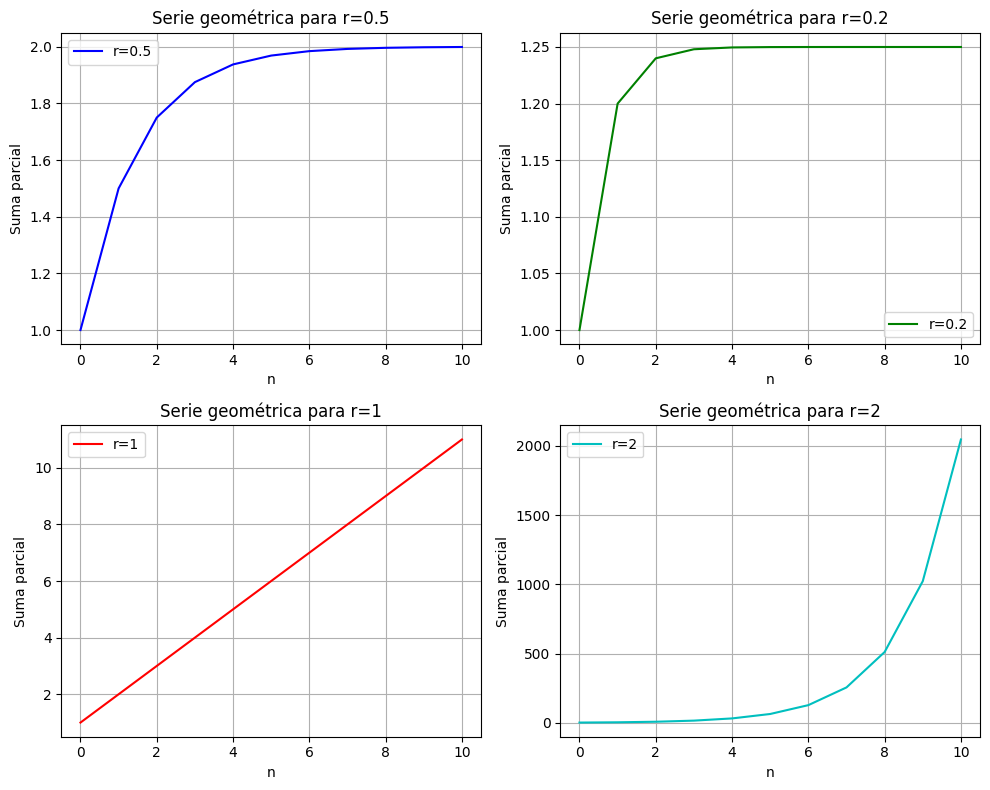

In [26]:
Rs =[1/2,1/5,1,2]
N = 10
colors = ['b', 'g', 'r', 'c']
 
def geometric_serie(r, N):
    an = [r**i for i in range (N+1)]
    SP = np.cumsum(an)
    return SP

# Cortesia Stack overflow :b 
# La verdad me parece muy chevere lo que se puede hacer con matplotlib
def graph_serie(SP,N, ax,r, color):
    ax.plot(np.arange(N + 1), SP, label=f"r={r}", color=color)
    ax.grid(True)
    ax.set_xlabel('n')
    ax.set_ylabel('Suma parcial')
    ax.set_title(f'Serie geométrica para r={r}')
    ax.legend()

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

for i, r in enumerate(Rs):
    row = i // 2
    col = i % 2
    SP = geometric_serie(r, N)
    graph_serie(SP, N, axs[row, col], r, colors[i])

plt.tight_layout()
plt.show()





Es claro notar que el crecimiento de las sumatorias cuando $|r| < 1$ es acotado al valor de $\frac{1}{1-r}$, por tanto la sumatoria con $r = \frac{1}{2}$ converge a $2$ y la sumatoria con $r = \frac{1}{5}$ converge a $1.25$

Definir una funcion que calcule los N primeros terminos de la sucesion de Fibonacci que esta dada por:

- $F_0 = 0$
- $F_1 = 1$
- $F_n = F_{n-1} + F_{n-2}$

Note que estamos tomando $N = 0$ como $a_0 = 0$ 
  

In [27]:
def fibonacci(N, return_all_list = True):
    if N == 0:
        return [0]
    if N == 1:
        return [0,1]
    an = [0,1]
    for _ in range(2, N+1):
        an.append(an[-1] + an[-2])
    return an if return_all_list else an[len(an)-1] 

print(fibonacci(10, False))
fibonacci(10)


55


[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55]

Construir una funcion que grafique la espiral de Fibonacci hasta el numero $F_5$

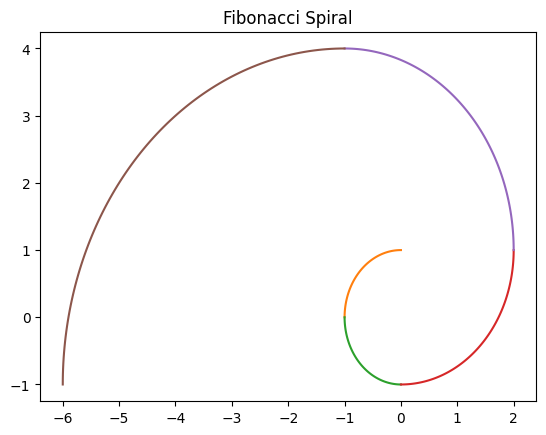

In [31]:
def fibonacci_spiral(n):
    fibonacci_list = fibonacci(n)
    plt.title("Fibonacci Spiral")
    directions = [(0,1), (1,0), (0,-1), (-1,0)]
    x0, y0 = 0, 0
    for n in enumerate(fibonacci_list):
        theta = np.linspace(0, np.pi/2, 100) + n[0]*np.pi/2
        if n[0] >= 2:
            y0 += fibonacci_list[n[0] - 2] * directions[(n[0] - 2) % 4][0]
            x0 += fibonacci_list[n[0] - 2] * directions[(n[0] - 2) % 4][1]
        x = n[1]*np.cos(theta) + x0
        y = n[1]*np.sin(theta) + y0
        plt.plot(x, y)

fibonacci_spiral(5)




Utilizando la funcion anterior, explorar el comportamiento de la espiral cuando $n = 5$, $n = 5 + 4$, $n = 5 + 4 + 4$, etc. Discuta lo que observa del comportamiento de la espiral.

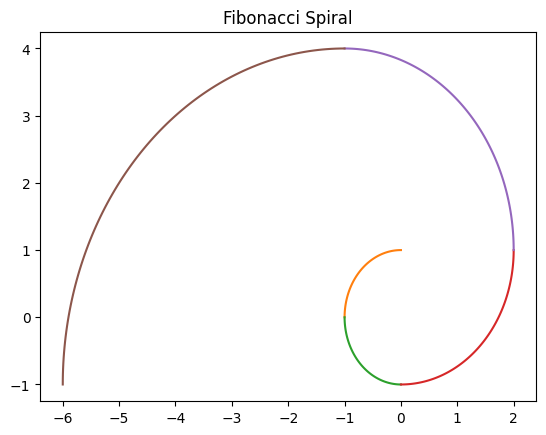

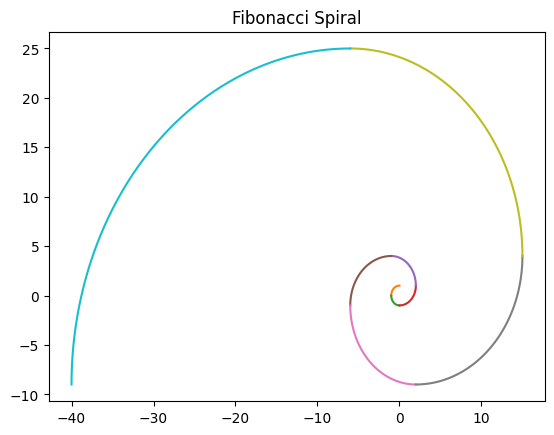

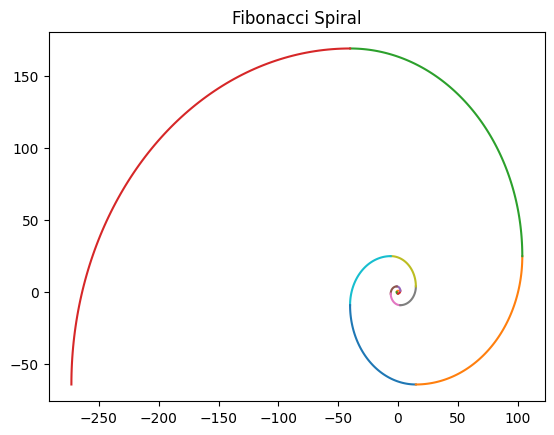

In [29]:
ns=[5, 9, 13]
for n in ns:
    plt.figure()
    fibonacci_spiral(n)
    

Note que la curva generada sigue un ciclo de 4 pasos, **abajo, derecha, arriba, izquierda**, esto se cumple para todo $5+4n$, no se cumple para cualquier 4n, debido a que las primeras 5 iteraciones son caso especial, muy probablemente porque $F0$, $F1$ son definidos como paso recursivo de la sucesion recursiva, la cual esta definida de la forma $F_{n-1}+F_{n-2}$ lo cual solo es posible a partir de $F_2$